<a href="https://colab.research.google.com/github/Navid-P86/1/blob/main/Marketing_models_finalv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 1: LOAD AND EXPLORE DATA







In [ ]:
# Import necessary library
import pandas as pd

# Step 1.1: Load the dataset
# Make sure the CSV file is in the same directory as this script
file_path = "processed_marketing_campaign.csv"
df = pd.read_csv(file_path)

# Step 1.2: Display the first few rows to get an overview
print("===== First 5 Rows of Dataset =====")
print(df.head())

# Step 1.3: Display dataset shape (rows, columns)
print("\n===== Dataset Shape =====")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Step 1.4: Display basic info about dataset (column names, types, nulls)
print("\n===== Data Info =====")
df.info()

# Step 1.5: Use describe() to get statistical summary of numerical columns
print("\n===== Statistical Summary (Numerical Columns) =====")
print(df.describe())

# Step 1.6: Use describe(include='object') to explore categorical columns
print("\n===== Summary of Categorical Columns =====")
print(df.describe(include='object'))

# Step 1.7: Check for missing values
print("\n===== Missing Values in Each Column =====")
print(df.isnull().sum())

# Step 1.8: Display column names
print("\n===== Column Names =====")
print(df.columns.tolist())


===== First 5 Rows of Dataset =====
    Income  Recency  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0  58138.0       58                  3                8                   10   
1  46344.0       38                  2                1                    1   
2  71613.0       26                  1                8                    2   
3  26646.0       26                  2                2                    0   
4  58293.0       94                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  Z_CostContact  Z_Revenue  Response  \
0                  4                  7              3         11         1   
1                  2                  5              3         11         0   
2                 10                  4              3         11         0   
3                  4                  6              3         11         0   
4                  6                  5              3         11         0   

   Total

# STEP 2: DEFINE TARGET AND CREATE SCATTER PLOTS (NUMERIC + CATEGORICAL)





Numeric features: 11
Categorical features: 4


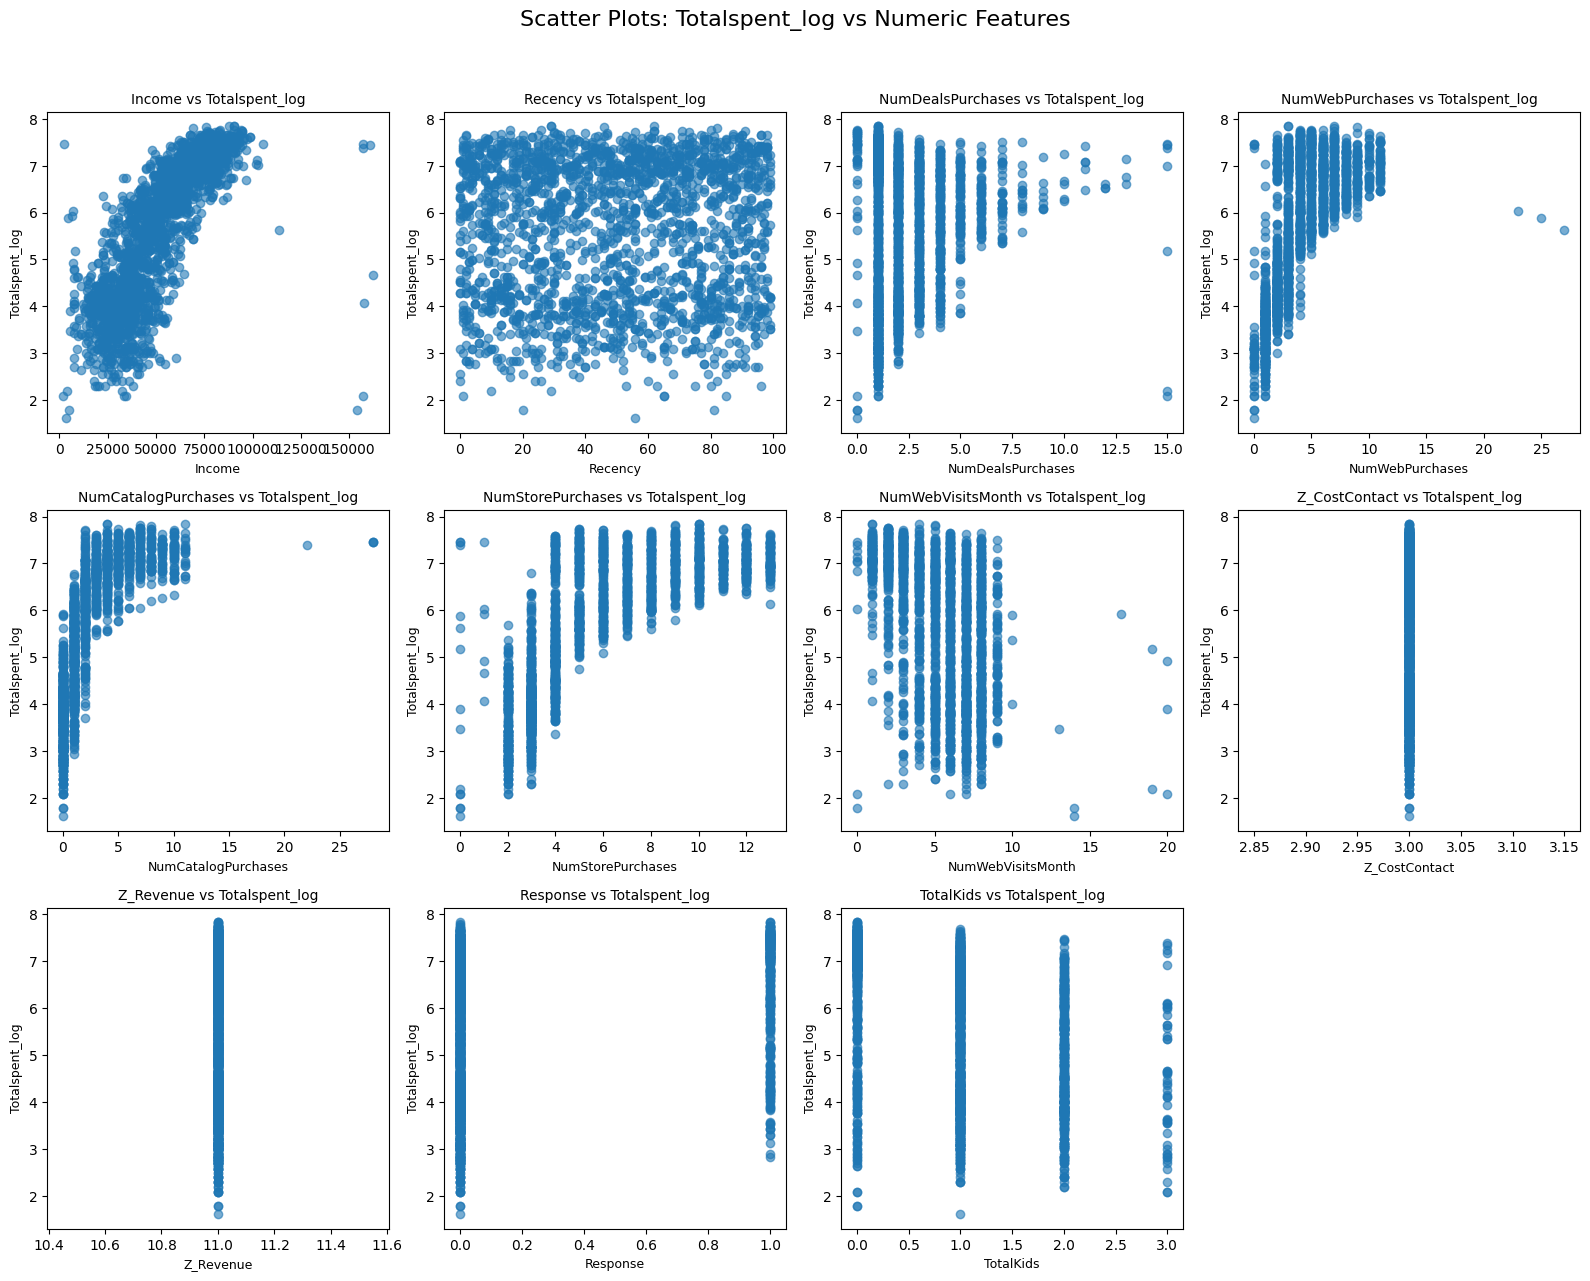

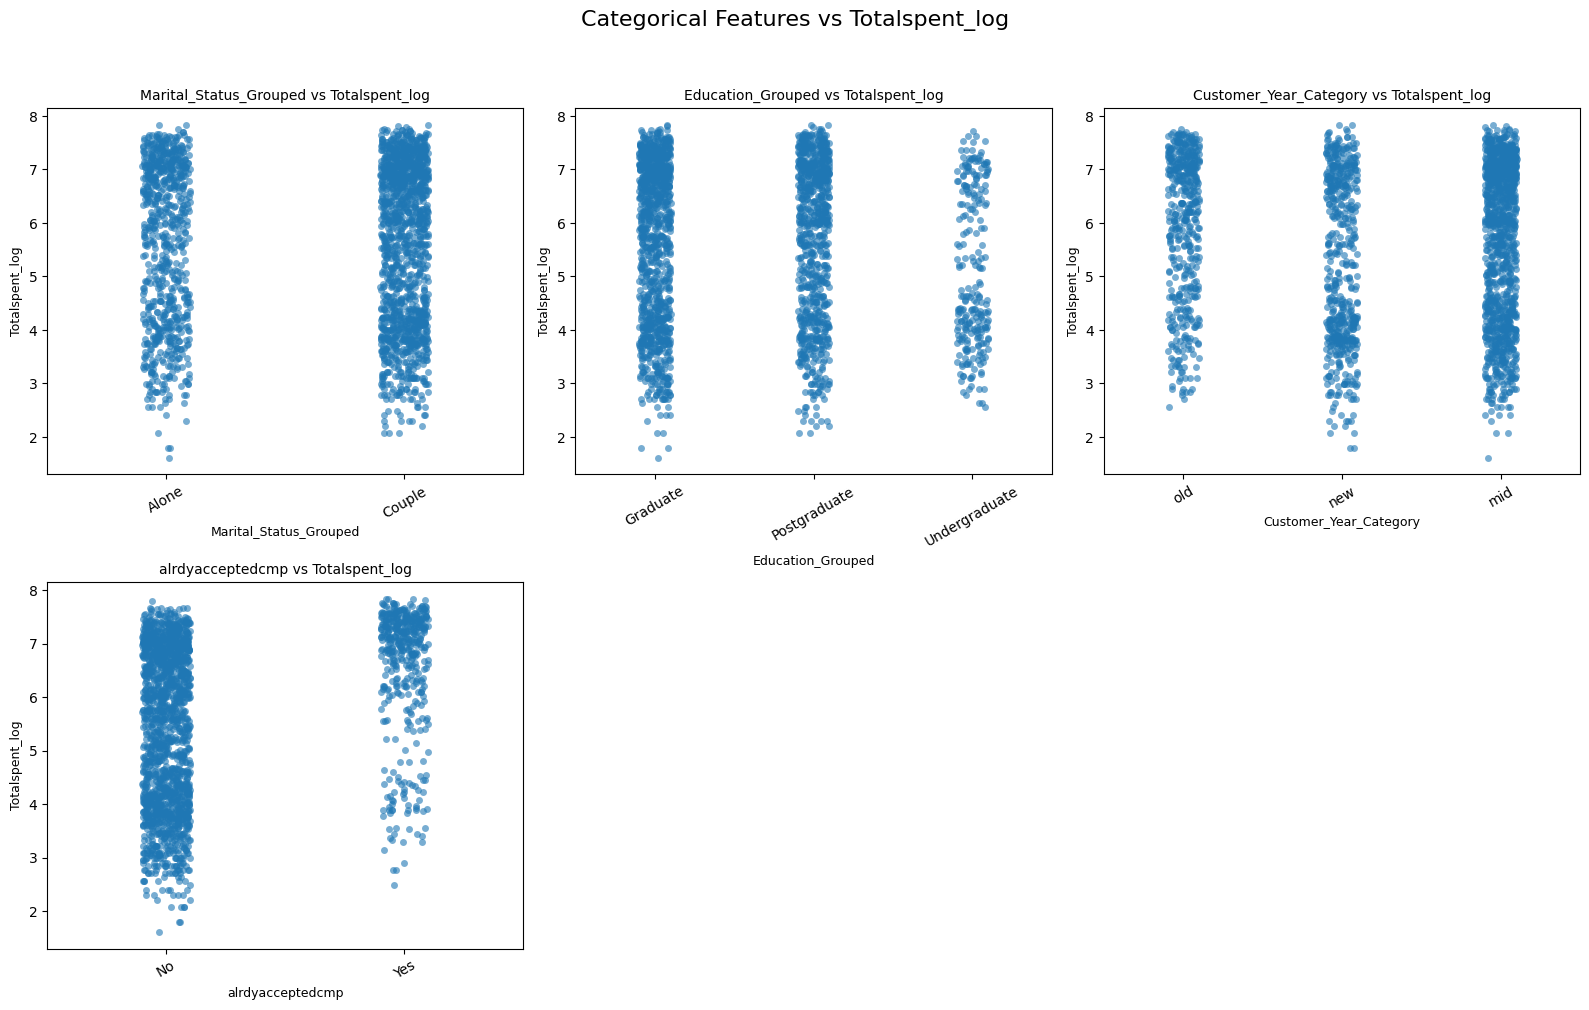

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 2.1: Define target
target = 'Totalspent_log'

# Step 2.2: Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Step 2.3: Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

print(f"Numeric features: {len(numeric_features)}")
print(f"Categorical features: {len(categorical_features)}")

############################################################
# NUMERIC FEATURES SCATTER PLOTS
############################################################

num_to_plot = numeric_features[:16]  # limit to 16 for clarity

fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle("Scatter Plots: Totalspent_log vs Numeric Features", fontsize=16, y=1.02)

for i, feature in enumerate(num_to_plot):
    row, col = divmod(i, 4)
    ax = axes[row, col]
    ax.scatter(df[feature], y, alpha=0.6)
    ax.set_xlabel(feature, fontsize=9)
    ax.set_ylabel('Totalspent_log', fontsize=9)
    ax.set_title(f'{feature} vs Totalspent_log', fontsize=10)

# Remove unused subplots if fewer than 16 numeric features
for j in range(len(num_to_plot), 16):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

############################################################
# CATEGORICAL FEATURES STRIP PLOTS
############################################################

cat_to_plot = categorical_features[:9]  # up to 9 for better readability

fig, axes = plt.subplots(3, 3, figsize=(16, 14))
fig.suptitle("Categorical Features vs Totalspent_log", fontsize=16, y=1.02)

for i, feature in enumerate(cat_to_plot):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    sns.stripplot(x=df[feature], y=y, alpha=0.6, jitter=True, ax=ax)
    ax.set_xlabel(feature, fontsize=9)
    ax.set_ylabel('Totalspent_log', fontsize=9)
    ax.set_title(f'{feature} vs Totalspent_log', fontsize=10)
    ax.tick_params(axis='x', rotation=30)

# Remove unused subplots if fewer than 9 categorical features
for j in range(len(cat_to_plot), 9):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


# Step 3: Split, Scale, and One-Hot Encode with Column Names

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# ---- Step 3.1: Define features and target ----
target = 'Totalspent_log'
X = df.drop(columns=[target])
y = df[target]

# ---- Step 3.2: Split train/test ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Step 3.3: Identify numeric and categorical features ----
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# ---- Step 3.4: Preprocessing pipeline ----
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
])

# ---- Step 3.5: Fit transformer on train set ----
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# ---- Step 3.6: Get all feature names after OHE ----
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(ohe_feature_names)

# ---- Step 3.7: Convert to DataFrame to see column names ----
X_train_df = pd.DataFrame(X_train_transformed, columns=all_feature_names, index=X_train.index)
X_test_df  = pd.DataFrame(X_test_transformed, columns=all_feature_names, index=X_test.index)

# ---- Step 3.8: Display first few rows and all column names ----
print("Columns after OHE and scaling:")
print(X_train_df.columns.tolist())
display(X_train_df.head())


Columns after OHE and scaling:
['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue', 'Response', 'TotalKids', 'Marital_Status_Grouped_Couple', 'Education_Grouped_Postgraduate', 'Education_Grouped_Undergraduate', 'Customer_Year_Category_new', 'Customer_Year_Category_old', 'alrdyacceptedcmp_Yes']


,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Response,TotalKids,Marital_Status_Grouped_Couple,Education_Grouped_Postgraduate,Education_Grouped_Undergraduate,Customer_Year_Category_new,Customer_Year_Category_old,alrdyacceptedcmp_Yes
1977,0.227116,-0.102440,0.361088,-0.035915,0.114549,0.682557,-0.546625,0.0,0.0,-0.41134,0.076660,1.0,1.0,0.0,0.0,1.0,0.0
798,1.871351,0.793305,-1.227878,0.327130,0.794539,1.922233,-1.784755,0.0,0.0,-0.41134,-1.266036,1.0,1.0,0.0,0.0,0.0,0.0
1493,1.298217,-1.652767,-0.698222,-0.035915,1.814525,0.992476,-1.372045,0.0,0.0,-0.41134,-1.266036,1.0,0.0,0.0,1.0,0.0,0.0
1364,0.123737,0.862208,0.890743,-0.398959,-0.565441,-0.557118,0.278795,0.0,0.0,-0.41134,1.419357,1.0,0.0,1.0,0.0,0.0,0.0
903,1.070101,0.827756,-0.698222,0.690175,2.154520,0.992476,-0.959335,0.0,0.0,-0.41134,-1.266036,0.0,1.0,0.0,0.0,0.0,1.0


# Step 4: Target and Feature Setup

In [ ]:
# Target variable
y_train_target = y_train
y_test_target  = y_test

# Features
X_train_features = X_train_df.copy()
X_test_features  = X_test_df.copy()


# Step 5: Linear Regression on all features (lnr1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import numpy as np

# Fit Linear Regression
lnr1 = LinearRegression()
lnr1.fit(X_train_features, y_train_target)

# Predict
y_train_pred = lnr1.predict(X_train_features)
y_test_pred  = lnr1.predict(X_test_features)

# Compute R²
r2_train = r2_score(y_train_target, y_train_pred)
r2_test  = r2_score(y_test_target, y_test_pred)
r2_cv_mean = np.mean(cross_val_score(lnr1, X_train_features, y_train_target, cv=5, scoring='r2'))

print("===== Linear Regression (lnr1) =====")
print(f"R² Train: {r2_train:.4f}, R² Test: {r2_test:.4f}, CV R²: {r2_cv_mean:.4f}")


===== Linear Regression (lnr1) =====
R² Train: 0.8782, R² Test: 0.8752, CV R²: 0.8729


# Step 6: Ridge Regression (ridge1)

In [ ]:
from sklearn.linear_model import Ridge

ridge1 = Ridge(alpha=1.0)
ridge1.fit(X_train_features, y_train_target)

y_train_pred_ridge = ridge1.predict(X_train_features)
y_test_pred_ridge  = ridge1.predict(X_test_features)

r2_train_ridge = r2_score(y_train_target, y_train_pred_ridge)
r2_test_ridge  = r2_score(y_test_target, y_test_pred_ridge)

print("===== Ridge Regression (ridge1) =====")
print(f"R² Train: {r2_train_ridge:.4f}, R² Test: {r2_test_ridge:.4f}")


===== Ridge Regression (ridge1) =====
R² Train: 0.8782, R² Test: 0.8752


# Step 7: RidgeCV (ridgeCV1)

In [ ]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-3, 3, 20)
ridgeCV1 = RidgeCV(alphas=alphas, cv=5, scoring='r2')
ridgeCV1.fit(X_train_features, y_train_target)

y_train_pred_rcv = ridgeCV1.predict(X_train_features)
y_test_pred_rcv  = ridgeCV1.predict(X_test_features)
r2_train_rcv = r2_score(y_train_target, y_train_pred_rcv)
r2_test_rcv  = r2_score(y_test_target, y_test_pred_rcv)

print("===== RidgeCV (ridgeCV1) =====")
print(f"Best alpha: {ridgeCV1.alpha_}")
print(f"R² Train: {r2_train_rcv:.4f}, R² Test: {r2_test_rcv:.4f}")


===== RidgeCV (ridgeCV1) =====
Best alpha: 54.555947811685144
R² Train: 0.8780, R² Test: 0.8760


# Step 8: Lasso (lasso1)

In [ ]:
from sklearn.linear_model import Lasso

lasso1 = Lasso(alpha=0.01, max_iter=10000)
lasso1.fit(X_train_features, y_train_target)

y_train_pred_lasso = lasso1.predict(X_train_features)
y_test_pred_lasso  = lasso1.predict(X_test_features)
r2_train_lasso = r2_score(y_train_target, y_train_pred_lasso)
r2_test_lasso  = r2_score(y_test_target, y_test_pred_lasso)

print("===== Lasso (lasso1) =====")
print(f"R² Train: {r2_train_lasso:.4f}, R² Test: {r2_test_lasso:.4f}")


===== Lasso (lasso1) =====
R² Train: 0.8768, R² Test: 0.8744


# Step 9: LassoCV (lassoCV1)

In [ ]:
from sklearn.linear_model import LassoCV

lassoCV1 = LassoCV(cv=5, max_iter=10000, random_state=42)
lassoCV1.fit(X_train_features, y_train_target)

y_train_pred_lassocv = lassoCV1.predict(X_train_features)
y_test_pred_lassocv  = lassoCV1.predict(X_test_features)
r2_train_lassocv = r2_score(y_train_target, y_train_pred_lassocv)
r2_test_lassocv  = r2_score(y_test_target, y_test_pred_lassocv)

print("===== LassoCV (lassoCV1) =====")
print(f"Best alpha: {lassoCV1.alpha_}")
print(f"R² Train: {r2_train_lassocv:.4f}, R² Test: {r2_test_lassocv:.4f}")


===== LassoCV (lassoCV1) =====
Best alpha: 0.002071234940725564
R² Train: 0.8782, R² Test: 0.8754


# Step 10: Lasso for Feature Selection (High Alpha)

In [ ]:
high_alpha = 0.01  # adjust as needed
lasso_fs = Lasso(alpha=high_alpha, max_iter=10000)
lasso_fs.fit(X_train_features, y_train_target)

coefs = lasso_fs.coef_
nonzero_idx = np.where(coefs != 0)[0]

selected_features = pd.DataFrame({
    'Feature': X_train_features.columns[nonzero_idx],
    'Coefficient': coefs[nonzero_idx]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(f"Number of non-zero coefficients: {len(nonzero_idx)}")
display(selected_features.head(20))


Number of non-zero coefficients: 12


,Feature,Coefficient
0,Income,0.482807
3,NumWebPurchases,0.385102
5,NumStorePurchases,0.360202
4,NumCatalogPurchases,0.286695
8,TotalKids,-0.227897
2,NumDealsPurchases,0.189244
9,Customer_Year_Category_new,-0.116309
10,Customer_Year_Category_old,0.081107
11,alrdyacceptedcmp_Yes,0.071173
7,Response,0.031615


# Step 11: Linear Regression on Selected Features (lnr_fixed)

In [ ]:
X_train_fixed = X_train_features.iloc[:, nonzero_idx]
X_test_fixed  = X_test_features.iloc[:, nonzero_idx]

lnr_fixed = LinearRegression()
lnr_fixed.fit(X_train_fixed, y_train_target)

y_train_pred_fixed = lnr_fixed.predict(X_train_fixed)
y_test_pred_fixed  = lnr_fixed.predict(X_test_fixed)

r2_train_fixed = r2_score(y_train_target, y_train_pred_fixed)
r2_test_fixed  = r2_score(y_test_target, y_test_pred_fixed)
r2_cv_fixed    = np.mean(cross_val_score(lnr_fixed, X_train_fixed, y_train_target, cv=5, scoring='r2'))

print("===== Linear Regression on Selected Features (lnr_fixed) =====")
print(f"R² Train: {r2_train_fixed:.4f}, R² Test: {r2_test_fixed:.4f}, CV R²: {r2_cv_fixed:.4f}")


===== Linear Regression on Selected Features (lnr_fixed) =====
R² Train: 0.8778, R² Test: 0.8758, CV R²: 0.8729


# Step 12: Polynomial Features (Interactions Only)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_interact = poly.fit_transform(X_train_features)
X_test_interact  = poly.transform(X_test_features)

interaction_feature_names = poly.get_feature_names_out(X_train_features.columns)


# Step 13: Lasso on Interaction Features (High Alpha)

In [ ]:
lasso_interact = Lasso(alpha=high_alpha, max_iter=10000)
lasso_interact.fit(X_train_interact, y_train_target)

coefs_interact = lasso_interact.coef_
nonzero_idx_interact = np.where(coefs_interact != 0)[0]

selected_interactions = pd.DataFrame({
    'Feature': interaction_feature_names[nonzero_idx_interact],
    'Coefficient': coefs_interact[nonzero_idx_interact]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(f"Number of non-zero interaction coefficients: {len(nonzero_idx_interact)}")
display(selected_interactions.head(20))


Number of non-zero interaction coefficients: 49


,Feature,Coefficient
4,NumCatalogPurchases,0.536294
5,NumStorePurchases,0.433951
0,Income,0.373478
3,NumWebPurchases,0.259179
36,NumCatalogPurchases NumStorePurchases,-0.227706
8,TotalKids,-0.174125
15,Income NumCatalogPurchases,-0.158492
27,NumDealsPurchases NumCatalogPurchases,-0.132907
2,NumDealsPurchases,0.131437
33,NumWebPurchases NumStorePurchases,-0.120474


# Step 14: Linear Regression on Selected Interaction Features (lnr_fixed_poly2)

In [ ]:
X_train_fixed_poly2 = X_train_interact[:, nonzero_idx_interact]
X_test_fixed_poly2  = X_test_interact[:, nonzero_idx_interact]

lnr_fixed_poly2 = LinearRegression()
lnr_fixed_poly2.fit(X_train_fixed_poly2, y_train_target)

y_train_pred_poly2 = lnr_fixed_poly2.predict(X_train_fixed_poly2)
y_test_pred_poly2  = lnr_fixed_poly2.predict(X_test_fixed_poly2)
r2_train_poly2 = r2_score(y_train_target, y_train_pred_poly2)
r2_test_poly2  = r2_score(y_test_target, y_test_pred_poly2)
r2_cv_poly2    = np.mean(cross_val_score(lnr_fixed_poly2, X_train_fixed_poly2, y_train_target, cv=5, scoring='r2'))

print("===== Linear Regression on Selected Interaction Features (lnr_fixed_poly2) =====")
print(f"R² Train: {r2_train_poly2:.4f}, R² Test: {r2_test_poly2:.4f}, CV R²: {r2_cv_poly2:.4f}")


===== Linear Regression on Selected Interaction Features (lnr_fixed_poly2) =====
R² Train: 0.9451, R² Test: 0.9401, CV R²: 0.9067


# Step 15: RidgeCV on Interaction Features (ridgeCV_poly)

In [ ]:
ridgeCV_poly = RidgeCV(alphas=alphas, cv=5, scoring='r2')
ridgeCV_poly.fit(X_train_interact, y_train_target)

y_train_pred_ridgepoly = ridgeCV_poly.predict(X_train_interact)
y_test_pred_ridgepoly  = ridgeCV_poly.predict(X_test_interact)
r2_train_ridgepoly = r2_score(y_train_target, y_train_pred_ridgepoly)
r2_test_ridgepoly  = r2_score(y_test_target, y_test_pred_ridgepoly)

print("===== RidgeCV on Interaction Features (ridgeCV_poly) =====")
print(f"Best alpha: {ridgeCV_poly.alpha_}")
print(f"R² Train: {r2_train_ridgepoly:.4f}, R² Test: {r2_test_ridgepoly:.4f}")


===== RidgeCV on Interaction Features (ridgeCV_poly) =====
Best alpha: 112.88378916846884
R² Train: 0.9454, R² Test: 0.9388


# **Step 16: LassoCV on Interaction Features (lassoCV_poly)**

In [ ]:
lassoCV_poly = LassoCV(cv=5, max_iter=10000, random_state=42)
lassoCV_poly.fit(X_train_interact, y_train_target)

y_train_pred_lassocv_poly = lassoCV_poly.predict(X_train_interact)
y_test_pred_lassocv_poly  = lassoCV_poly.predict(X_test_interact)
r2_train_lassocv_poly = r2_score(y_train_target, y_train_pred_lassocv_poly)
r2_test_lassocv_poly  = r2_score(y_test_target, y_test_pred_lassocv_poly)

print("===== LassoCV on Interaction Features (lassoCV_poly) =====")
print(f"Best alpha: {lassoCV_poly.alpha_}")
print(f"R² Train: {r2_train_lassocv_poly:.4f}, R² Test: {r2_test_lassocv_poly:.4f}")


===== LassoCV on Interaction Features (lassoCV_poly) =====
Best alpha: 0.0011852367839724133
R² Train: 0.9499, R² Test: 0.9443


# ===== Summary of All Models =====

In [ ]:
import pandas as pd
import numpy as np

# ---- helper function to count non-zero coefficients ----
def count_nonzero_coefs(model, X=None):
    """
    Returns number of non-zero coefficients for models that have coef_ attribute.
    If model is LinearRegression or Ridge without regularization, all coefficients are counted.
    """
    if hasattr(model, "coef_"):
        coefs = model.coef_
        # If X is provided and interaction/poly features, ensure length matches
        if X is not None and len(coefs) != X.shape[1]:
            coefs = coefs[:X.shape[1]]  # safety
        return np.sum(coefs != 0)
    else:
        return np.nan

# ---- collect results ----
summary = pd.DataFrame({
    "Model": [
        "LinearRegression_all",
        "Ridge_all",
        "RidgeCV_all",
        "Lasso_all",
        "LassoCV_all",
        "LinearRegression_selected",
        "LinearRegression_poly2",
        "RidgeCV_poly",
        "LassoCV_poly"
    ],
    "R2_Train": [
        r2_train, r2_train_ridge, r2_train_rcv, r2_train_lasso, r2_train_lassocv,
        r2_train_fixed, r2_train_poly2, r2_train_ridgepoly, r2_train_lassocv_poly
    ],
    "R2_Test": [
        r2_test, r2_test_ridge, r2_test_rcv, r2_test_lasso, r2_test_lassocv,
        r2_test_fixed, r2_test_poly2, r2_test_ridgepoly, r2_test_lassocv_poly
    ],
    "R2_CV": [
        r2_cv_mean, np.nan, r2_test_rcv, np.nan, np.nan,
        r2_cv_fixed, r2_cv_poly2, np.nan, np.nan
    ],
    "NumNZero": [
        count_nonzero_coefs(lnr1, X_train_features),
        count_nonzero_coefs(ridge1, X_train_features),
        count_nonzero_coefs(ridgeCV1, X_train_features),
        count_nonzero_coefs(lasso1, X_train_features),
        count_nonzero_coefs(lassoCV1, X_train_features),
        count_nonzero_coefs(lnr_fixed, X_train_fixed),
        count_nonzero_coefs(lnr_fixed_poly2, X_train_fixed_poly2),
        count_nonzero_coefs(ridgeCV_poly, X_train_interact),
        count_nonzero_coefs(lassoCV_poly, X_train_interact)
    ]
})

# ---- display summary ----
pd.set_option("display.float_format", "{:.4f}".format)
display(summary)


,Model,R2_Train,R2_Test,R2_CV,NumNZero
0,LinearRegression_all,0.8782,0.8752,0.8729,16
1,Ridge_all,0.8782,0.8752,NaN,15
2,RidgeCV_all,0.8780,0.8760,0.8760,15
3,Lasso_all,0.8768,0.8744,NaN,12
4,LassoCV_all,0.8782,0.8754,NaN,15
5,LinearRegression_selected,0.8778,0.8758,0.8729,12
6,LinearRegression_poly2,0.9451,0.9401,0.9067,49
7,RidgeCV_poly,0.9454,0.9388,NaN,118
8,LassoCV_poly,0.9499,0.9443,NaN,99
